# Engineering and Computer Science Session 3: Non-Linear Programming with Python

We will use the `scipy.optimize.minimize` function. Unlike linear programming, we must define our functions manually using Python `def` blocks.

**Documentation:**
* [Click here for the official SciPy `minimize` documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)


In [ ]:
# import the minimize function
from scipy.optimize import minimize

### Key Arguments Guide

To use `minimize`, the setup is slightly different from `linprog`.

| Argument | Description | Important Rule |
| :--- | :--- | :--- |
| **`fun`** | **The Objective Function** | A python function `def objective(x):` that returns the value to minimize. | If you want to **Maximize**, your function must return the **negative** value (e.g., return `-profit`). |
| **`x0`** | **Initial Guess** | A simple list of starting numbers (e.g., `[1, 1]`). | Non-linear solvers need a starting point to "roll down the hill." |
| **`constraints`** | **List of Dictionaries** | A list containing the rules. | Inequality constraints must be written in the form $g(x) \ge 0$ (Greater than or equal to Zero). |
| **`bounds`** | **Variable Limits** | Just like in LP, use `(0, None)` for non-negativity. | |

> **Critical Constraint Rule:** The solver assumes all inequalities are "Non-Negative" ($ \ge 0$). 
> * If you have $x + y \le 100$, you must rearrange it to: $100 - (x + y) \ge 0$.

## Example: Great Western Appliance (Toaster Production)

We want to maximize profit based on a non-linear profit curve.

### Define the Problem

In [ ]:
# a. Define the Objective Function
# --------------------------------
# Profit = 28*x1 + 21*x2 + 0.25*(x2^2)
# We minimize the NEGATIVE profit to achieve maximization.

def objective(x):
    x1 = x[0] # Microtoaster
    x2 = x[1] # Self-Clean Toaster
    return -(28*x1 + 21*x2 + 0.25 * x2**2)

b. Define the Constraints

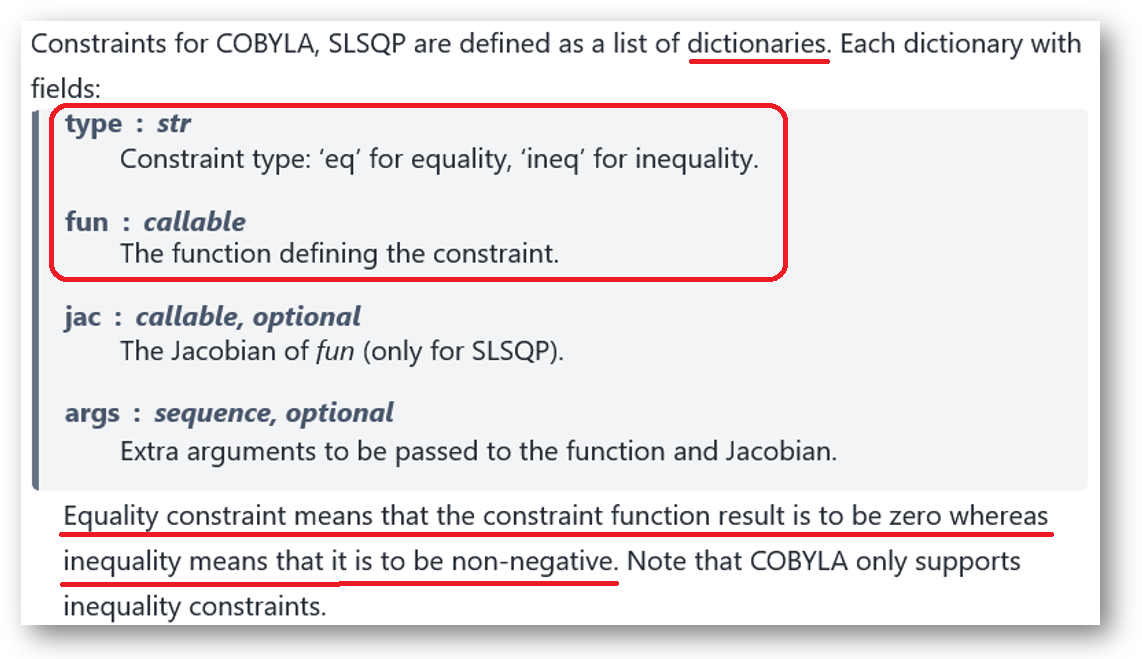

In [ ]:
# Rule: All constraints must return a value >= 0

# Constraint 1: Production capacity (x1 + x2 <= 1000)
# Rearranged: 1000 - (x1 + x2) >= 0
def constraint_capacity(x):
    x1 = x[0]
    x2 = x[1]
    return 1000 - (x1 + x2)

In [ ]:
# Rule: All constraints must return a value >= 0

# Constraint 2: Sales Hours (0.5*x1 + 0.4*x2 <= 500)
# Rearranged: 500 - (...) >= 0
def constraint_sales(x):
    x1 = x[0]
    x2 = x[1]
    return 500 - (0.5*x1 + 0.4*x2)

In [ ]:
# Load them into a list
# 'type': 'ineq' means Inequality (>= 0)
constraints = [
    {'type': 'ineq', 'fun': constraint_capacity},
    {'type': 'ineq', 'fun': constraint_sales}
]

In [ ]:
# Bounds (0 to Infinity)
# (0, None) tells Python there is no upper limit
bounds = ((0, None), (0, None))

### Solve the Problem

In [ ]:
# Initial Guess (Start at 1 unit of each)
x0 = [1, 1]

solution = minimize(
    objective, 
    x0, 
    method='SLSQP', 
    bounds=bounds, 
    constraints=constraints
)

### Print the Results

In [ ]:
if solution.success:
    print("Optimization Successful!")
    
    # Standard Scientific Output
    # Note: We access the result just like a list: solution.x[0]
    print(f"Raw x1:             {solution.x[0]}")
    print(f"Raw x2:             {solution.x[1]}")
    print(f"Maximum Profit:     ${-solution.fun:.2f}") # The code :.2f is used to round to two decimal places. 
else:
    print("No solution found.")

In [ ]:
if solution.success:
    print("Optimization Successful!")
     
    # Business Output (Relax and Round Strategy)
    # We round the float result to the nearest integer for decision making
    x1_final = int(round(solution.x[0]))
    x2_final = int(round(solution.x[1]))
    
    print(f"Microtoaster (x1):  {x1_final} units")
    print(f"Self-Clean (x2):    {x2_final} units")
    print(f"Maximum Profit:     ${-solution.fun:.2f}") # The code :.2f is used to round to two decimal places. 
else:
    print("No solution found.")

## Exercise: Thermlock Corporation (Gaskets)

Replace the following placeholders `[_______]` with the correct values and solve the problem.

### Define the Problem

In [ ]:
# a. Define the Objective Function

def objective_thermlock(x):
    x1 = x[0]
    x2 = x[1]
    return [________________]

In [ ]:
# b. Define Constraints
# REMINDER: Rearrange so formula >= 0

# Hardness
def cons_hardness(x):
    x1 = x[0]
    x2 = x[1]
    return [________________]

# Tensile
def cons_tensile(x):
    x1 = x[0]
    x2 = x[1]
    return [________________]

# Elasticity
def cons_elasticity(x):
    x1 = x[0]
    x2 = x[1]
    return [________________]

In [ ]:
# Load constraints
cons_thermlock = [
    {'type': [_______], 'fun': cons_hardness},
    {'type': [_______], 'fun': cons_tensile},
    {'type': [_______], 'fun': cons_elasticity}
]

# Bounds: (0, None) means 0 to Infinity
bounds_thermlock = ((0, None), (0, None))

### Solve the Problem

In [ ]:
# Initial guess (x0): Try [1, 1]
x0_guess = [1, 1]

result = minimize(
    [________________], 
    [________________], 
    method='SLSQP', 
    bounds=[________________], 
    constraints=[________________]
)

### Print the Results

In [ ]:
if result.success:
    print(f"Minimum Cost: ${result.fun:.2f}")
    print(f"Rubber (x1): {result.x[0]:.2f} lbs")
    print(f"Oil (x2):    {result.x[1]:.2f} lbs")
else:
    print("Solution failed")